# Normal Field Modelling from (Edwards and Nabighian 1991)

Questions from Page 52 (62 in PDF):

<b>Consider Figure 5 as a basis for my questions.</b>

Regarding equation (7) - 

$$A(\lambda, z) = \int_{0}^{\infty} 
A(r, z) J_1(\lambda r)rdr$$

Notation: Is this function written as A a function of two variables $(\lambda, z)$ or does the semicolon have special notation in this case? 

Modelling: Say you have a set of discrete points $(r, z)$ instead of a continuous function $A(r, z)$, how would you transform this discrete set in real space into a discrete set in Hankel space $(\lambda, z)$? Or is this not possible?

Notation: From gleaning the equations in this section, it's not apparent how the outputs $B_i$ and $B_{i+1}$ are vector quantities. Are they actually just working with scalar magnitudes in these equations?



Upward recursion FROM the $i^{th}$ layer

Note:

$Q_i$ is the top of the layer

$Q_{i+1}$ is the bottom of the layer

$$Q_i = \frac{1}{\rho_i \lambda} 
\left[\frac
{\rho_i \lambda Q_{i+1} + tanh(\lambda d_i)}
{\rho_i \lambda Q_{i+1} tanh(\lambda d_i) + 1} 
\right]$$

$$Q = \frac{B({\lambda})}{\mu E_r(\lambda)}$$

Starting value from the bottom:

$$Q_N = \frac{1}{\rho_N\lambda}$$

Downward Recursion TO the $i^{th}$ layer

$P_j$ is the bottom of the layer

$P_{j+1}$ is the top of the layer

$$P_j = \frac{1}{\rho_j \lambda} 
\left[\frac
{\rho_j \lambda Q_{j+1} + tanh(\lambda d_j)}
{\rho_j \lambda Q_{j+1} tanh(\lambda d_j) + 1} 
\right]$$

$$P = \left[\frac
{\mu_0 I}{2\pi\lambda} - B(\lambda) \right]$$

Starting value from the top:

$$P_M = \frac{1}{\rho_m\lambda}$$

Recursing up and down yields

SEED VALUE:

$$B_1 = \frac{\mu_0 I}{2\pi\lambda} 
\left[\frac{Q_1}{Q_1 + P_1}\right]$$

$$B_{i+1} = B_i \left[\frac
{\rho_i\lambda Q_{i+1} sech(\lambda d_i)}
{\rho_i\lambda Q_{i+1} + tanh(\lambda d_i)}
\right]$$



To translate to Henkel space:

$$A(\lambda, z) = \int_{0}^{\infty} 
A(r, z) J_1(\lambda r)rdr$$

One dimensional:
$$A(\lambda) = \int_{0}^{\infty}A(r)J_1(\lambda r)rdr$$


To translate to Real space:

$$A(r, z) = \int_{0}^{\infty} 
\lambda A(\lambda, z) J_1(\lambda r)d\lambda$$


In [8]:
import numpy as np
import scipy
import hankel
import matplotlib.pyplot as plt
ht = hankel.HankelTransform(nu=1, h=0.03, N=100)


In [2]:
f = lambda x: x

In [20]:
k = np.logspace(-0,10) # Create a log-spaced array of k from 0.1 to 10.
Fk = ht.transform(f,k,ret_err=False) # Return the transform of f at k.

-4.1852406992387705e-08

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

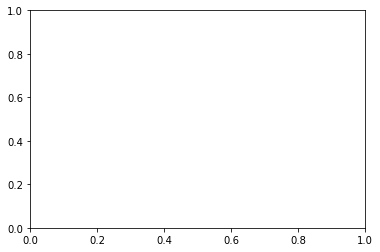

In [21]:
plt.plot(k,Fk)
plt.xscale('symlog')
plt.yscale('symlog')
plt.ylabel(r"$F_1(k)$", fontsize=15)
plt.xlabel(r"$k$", fontsize=15)
plt.show()

For this model, lets assume a Raglan style half space with an overlying layer of thickness 50m and $\rho = 10^{-1}$ and an underlying layer of thickness 50m and $\rho = 10^{1}$ which is subdivided into two sections, at which the electrode $O$ is placed in this interface

z (depth) is increasing down into the earth

$$FREE SPACE$$

----------

$$\rho_1 = 10^{-1}$$

$$d_1 = 50m$$

----------

$$\rho_2 = 10^{1}$$

$$d_2 = 25m$$

$$ELECTRODE \downarrow$$

----------

$$ELECTRODE \uparrow$$

$$\rho_3 = 10^{1}$$

$$d_3 = 25m$$

----------
$$FLOOR$$

In [4]:
import numpy as np
import scipy.special as sps

# Definitions
p1, d1 = 10**-1, 50
p2, d2 = 10, 25
p3, d3 = 10, 25

u0 = 1.256637062e-6

In [5]:
# Define a domain for calculating the field over
r = np.linspace(0, 10)
z = np.linspace(0, 100)
rr, zz = np.meshgrid(r, z)

In [6]:
sps.jv()

ValueError: invalid number of arguments